In [13]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [14]:
df_breast = pd.read_csv("../data/cancer.csv",encoding = "euc-kr")
df_breast.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df_breast.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [16]:
df_breast_x = df_breast.drop("diagnosis",axis = 1 )
df_breast_y = df_breast["diagnosis"]

In [17]:
df_breast_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
x= df_breast_x
y= df_breast_y
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1234)

print("train data x size : {}".format(x_tr.shape))
print("train data y size : {}".format(y_tr.shape))
print("test data x size : {}".format(x_test.shape))
print("test data y size : {}".format(y_test.shape))

train data x size : (398, 30)
train data y size : (398,)
test data x size : (171, 30)
test data y size : (171,)


In [19]:
knn_uncustomized = KNeighborsClassifier()

In [20]:
knn_uncustomized.fit(x_tr,y_tr)

y_pred = knn_uncustomized.predict(x_test)

print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(y_test.tolist()[:10]))
print("accuracy:{}".format(knn_uncustomized.score(x_test,y_test)))


predict test set:[1, 1, 1, 1, 1, 1, 0, 1, 0, 0]
test set label:[1, 1, 1, 1, 1, 1, 0, 1, 0, 0]
accuracy:0.935672514619883


<h2>KNN Train,Test data Scaling <h2>

In [21]:
x_tr_scaled = scale(x_tr,axis = 0)
x_test_scaled = scale(x_test,axis = 0)

pd.DataFrame(x_test_scaled,columns=x_tr.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.673277,0.139782,-0.663307,-0.656454,0.423137,-0.184124,-0.573772,-0.713969,0.221287,0.235983,...,-0.573251,0.554681,-0.566985,-0.542674,1.148905,0.391134,0.104662,-0.489951,0.550183,0.440279
1,-0.924069,-2.273200,-0.931471,-0.826001,0.005536,-0.901967,-0.783764,-0.837642,-1.451781,0.150269,...,-0.935906,-2.275996,-0.969596,-0.777519,0.615870,-0.885241,-0.831703,-1.047654,-1.227610,-0.390379
2,-0.448429,-0.705112,-0.345174,-0.481409,-0.053489,0.908380,0.840437,0.010559,1.001818,1.450033,...,-0.484141,-0.756973,-0.240429,-0.491097,-0.604500,1.211394,1.274709,0.350489,0.590008,1.363232
3,-1.308905,0.371485,-1.292077,-1.081190,0.629724,-0.508573,-0.828933,-0.889914,-0.275733,0.851439,...,-1.182512,1.018312,-1.169694,-0.920729,1.139554,-0.580915,-0.889604,-0.744144,0.027677,0.613582
4,-0.102508,-1.465752,-0.135723,-0.214647,0.043902,-0.327422,-0.613028,-0.604576,-1.525284,0.071581,...,-0.160859,-1.545988,-0.183388,-0.275163,0.031401,0.024746,-0.442053,-0.500100,-0.765639,0.286232


In [22]:
knn_scaled = KNeighborsClassifier()

In [23]:
# 스케일한 이후 정확도가 이전보다 높아졌음을 알 수 있다.
knn_scaled.fit(x_tr_scaled,y_tr)
y_pred = knn_scaled.predict(x_test_scaled)

print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(y_test.tolist()[:10]))
print("accuracy:{}".format(knn_scaled.score(x_test_scaled,y_test)))

predict test set:[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
test set label:[1, 1, 1, 1, 1, 1, 0, 1, 0, 0]
accuracy:0.9415204678362573


<h2>모델 생성<h2>
- 이웃 수 증가에 따른 정확도 변화를 살펴보자

In [24]:
# 최대 이웃수
max_neibor = 10 # 반복 수행할 리스트(1~10)
para_neibor = [i+1 for i in range(max_neibor)]

train_accuracy = []; test_accuracy = [];

for n_neibors in para_neibor:
    # 이웃 1~10까지 지정하여 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neibors)
    clf.fit(x_tr_scaled,y_tr)
    # train data 정확도
    train_accuracy.append(clf.score(x_tr_scaled,y_tr))
    # test data 정확도
    test_accuracy.append(clf.score(x_test_scaled,y_test))
    
df_neibors = pd.DataFrame()
df_neibors["Neighbors"] = para_neibor
df_neibors["TrainAccuracy"] = train_accuracy
df_neibors["TestAccuracy"] = test_accuracy
df_neibors
# 결과를 보면, 이웃의 숫자가 증가하면 max_neibor과소적합의 문제가 발생할 수 있음을 어림 짐작 가능하다.

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000000,0.935673
1,2,0.987437,0.923977
2,3,0.994975,0.929825
3,4,0.987437,0.941520
4,5,0.984925,0.941520
5,6,0.979899,0.947368
6,7,0.984925,0.941520
7,8,0.982412,0.935673
8,9,0.979899,0.935673
9,10,0.977387,0.929825


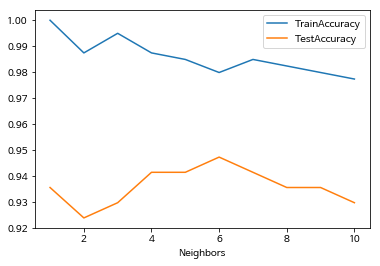

In [26]:
# 군집이 2개가 되면서 6까지 test 데이터의 정확도가 높아짐을 볼 수 있다.
df_neibors.set_index("Neighbors",inplace = False).plot.line()

<h2>모델 생성<h2>
- 가중치별 이웃 수 증가에 따른 정확도 변화

In [27]:
# 최대 이웃수
max_neibor = 10
para_neibor = [i+1 for i in range(max_neibor)]*2
# 가중치(uniform,distance)
para_w = ["uniform"] * max_neibor + ["distance"] * max_neibor

train_accuracy = []; test_accuracy = [];
# 1번 루프 : n_neibors = para_neibor[0],weights = para_w[0]
# 2번 루프 : n_neibors = para_neibor[1],weights = para_w[1]
for (n_neibors,w) in zip(para_neibor,para_w):
    clf = KNeighborsClassifier(n_neighbors=n_neibors,weights=w)
    clf.fit(x_tr_scaled,y_tr)
    train_accuracy.append(clf.score(x_tr_scaled,y_tr))
    test_accuracy.append(clf.score(x_test_scaled,y_test))
    
df_neibors_w = pd.DataFrame()
df_neibors_w["Neighbors"] = para_neibor
df_neibors_w["TrainAccuracy"] = train_accuracy
df_neibors_w["TestAccuracy"] = test_accuracy
df_neibors_w["Weights"] = para_w

df_neibors_w
# 군집이 올라갈 수록 distance weights 의 테스트 데이터 정확도가 올라가는 것을 확인할 수 있다.

,Neighbors,TrainAccuracy,TestAccuracy,Weights
0,1,1.000000,0.935673,uniform
1,2,0.987437,0.923977,uniform
2,3,0.994975,0.929825,uniform
3,4,0.987437,0.941520,uniform
4,5,0.984925,0.941520,uniform
5,6,0.979899,0.947368,uniform
6,7,0.984925,0.941520,uniform
7,8,0.982412,0.935673,uniform
8,9,0.979899,0.935673,uniform
9,10,0.977387,0.929825,uniform


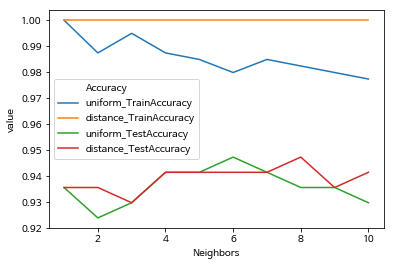

In [28]:
# pivot 의 역 = melt
df_neibors_w_melt = pd.melt(df_neibors_w,id_vars=["Neighbors","Weights"])
df_neibors_w_melt["Accuracy"] = df_neibors_w_melt["Weights"] + "_" + df_neibors_w_melt["variable"]

ax = sns.lineplot(x = "Neighbors",y = "value", hue = "Accuracy", data = df_neibors_w_melt )


In [29]:
df_neibors_w_melt # 확인

,Neighbors,Weights,variable,value,Accuracy
0,1,uniform,TrainAccuracy,1.000000,uniform_TrainAccuracy
1,2,uniform,TrainAccuracy,0.987437,uniform_TrainAccuracy
2,3,uniform,TrainAccuracy,0.994975,uniform_TrainAccuracy
3,4,uniform,TrainAccuracy,0.987437,uniform_TrainAccuracy
4,5,uniform,TrainAccuracy,0.984925,uniform_TrainAccuracy
5,6,uniform,TrainAccuracy,0.979899,uniform_TrainAccuracy
6,7,uniform,TrainAccuracy,0.984925,uniform_TrainAccuracy
7,8,uniform,TrainAccuracy,0.982412,uniform_TrainAccuracy
8,9,uniform,TrainAccuracy,0.979899,uniform_TrainAccuracy
9,10,uniform,TrainAccuracy,0.977387,uniform_TrainAccuracy


<h3>-알고리즘 별 이웃 수 증가에 따른 정확도 변화<h3>

In [30]:
# 최대 이웃수
# 이웃 수 증가
max_neibor = 10
para_neibor = [i+1 for i in range(max_neibor)] * 3
#알고리즘 : ball_tree , kd_tree, brute
para_al =  ["ball_tree"] * max_neibor + ["kd_tree"] * max_neibor + ["brute"] * max_neibor

train_accuracy = []; test_accuracy = [];

for (n_neibors,algo) in zip(para_neibor,para_al):
    clf = KNeighborsClassifier(n_neighbors=n_neibors,algorithm=algo)
    clf.fit(x_tr_scaled,y_tr)
    train_accuracy.append(clf.score(x_tr_scaled,y_tr))
    test_accuracy.append(clf.score(x_test_scaled,y_test))
    
df_neibors_al = pd.DataFrame()
df_neibors_al["Neighbors"] = para_neibor
df_neibors_al["TrainAccuracy"] = train_accuracy
df_neibors_al["TestAccuracy"] = test_accuracy
df_neibors_al["Algorithm"] = para_al

df_neibors_al

,Neighbors,TrainAccuracy,TestAccuracy,Algorithm
0,1,1.000000,0.935673,ball_tree
1,2,0.987437,0.923977,ball_tree
2,3,0.994975,0.929825,ball_tree
3,4,0.987437,0.941520,ball_tree
4,5,0.984925,0.941520,ball_tree
5,6,0.979899,0.947368,ball_tree
6,7,0.984925,0.941520,ball_tree
7,8,0.982412,0.935673,ball_tree
8,9,0.979899,0.935673,ball_tree
9,10,0.977387,0.929825,ball_tree


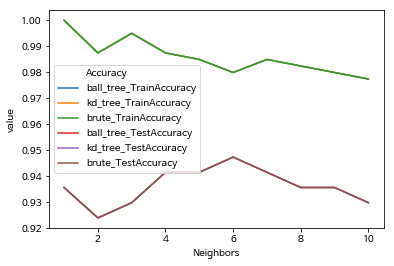

In [31]:
# pivot 의 역 = melt
# melt method : 데이터를 재구성하는 함수로 id_vars를 기준으로 transpose
df_neibors_al_melt = pd.melt(df_neibors_al,id_vars=["Neighbors","Algorithm"])

df_neibors_al_melt["Accuracy"] = df_neibors_al_melt["Algorithm"] + "_" + df_neibors_al_melt["variable"]

ax = sns.lineplot(x = "Neighbors",y = "value", hue = "Accuracy", data = df_neibors_al_melt )
# 알고리즘은 세개 모두 정확도가 일치하여, 어떤 알고리즘을 선택하든 상관없음을 확인 할 수 있다.

<h3>거리 계산 방법별 이웃 수 증가에 따른 정확도 변화<h3>

In [32]:
# 최대 이웃수
# 이웃 수 증가
# 거리 계산법에 따른 정확도 분석
max_neibor = 10
para_neibor = [i+1 for i in range(max_neibor)] * 3
#거리계산법 : minkowski, euclidean, manhattan
para_dis =  ["minkowski"] * max_neibor + ["euclidean"] * max_neibor + ["manhattan"] * max_neibor

train_accuracy = []; test_accuracy = [];

for (n_neibors,dis) in zip(para_neibor,para_dis):
    clf = KNeighborsClassifier(n_neighbors=n_neibors,weights="uniform",algorithm="ball_tree",metric=dis)
    clf.fit(x_tr_scaled,y_tr)
    train_accuracy.append(clf.score(x_tr_scaled,y_tr))
    test_accuracy.append(clf.score(x_test_scaled,y_test))
    
df_neibors_dis = pd.DataFrame()
df_neibors_dis["Neighbors"] = para_neibor
df_neibors_dis["TrainAccuracy"] = train_accuracy
df_neibors_dis["TestAccuracy"] = test_accuracy
df_neibors_dis["Metric"] = para_dis

df_neibors_dis

,Neighbors,TrainAccuracy,TestAccuracy,Metric
0,1,1.000000,0.935673,minkowski
1,2,0.987437,0.923977,minkowski
2,3,0.994975,0.929825,minkowski
3,4,0.987437,0.941520,minkowski
4,5,0.984925,0.941520,minkowski
5,6,0.979899,0.947368,minkowski
6,7,0.984925,0.941520,minkowski
7,8,0.982412,0.935673,minkowski
8,9,0.979899,0.935673,minkowski
9,10,0.977387,0.929825,minkowski


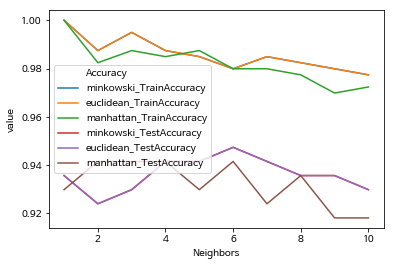

In [33]:
# pivot 의 역 = melt
df_neibors_dis_melt = pd.melt(df_neibors_dis,id_vars=["Neighbors","Metric"])
df_neibors_dis_melt["Accuracy"] = df_neibors_dis_melt["Metric"] + "_" + df_neibors_dis_melt["variable"]

ax = sns.lineplot(x = "Neighbors",y = "value", hue = "Accuracy", data = df_neibors_dis_melt )
# euclidean, minkowski 의 테스트 데이터의 정확도는 별 차이가 없다. 군집이 6인경우 둘 중 하나를 선택하면 된다.
# manhattan의 경우 군집의 수가 변화할 때 마다 정확도가 오르락내리락한다.

<h2>결론도출<h2>


In [35]:
#결론 도출
clf_model = KNeighborsClassifier(n_neighbors=6,weights="distance",algorithm="ball_tree",metric="euclidean")
clf_model.fit(x_tr_scaled,y_tr)
print("train data accuracy :{0:.3f}".format(clf_model.score(x_tr_scaled,y_tr)))
print("test data accuaracy: {0:.3f}".format(clf_model.score(x_test_scaled,y_test)))

# 위의 모든 경우의 수를 변경한 후 그래프와 수치로 판단했을때,
# 최적의 파라미터는 군집 =6 , 가중치 : distance , 알고지름: ball_tree, metric = euclidean 이다.
# 그렇다면, GridSearchCV를 사용하여, 최적의 파라미터를 찾아보자.

train data accuracy :1.000
test data accuaracy: 0.942


<h2>GridSearchCV<h2>

최적의 파라미터를 구하자(최적의 이웃 수를 구하자(1~30))

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
x = x_tr_scaled
y = y_trimport squarify


params_grid = {'n_neighbors' : [i+1 for i in range(30)]} # for문을 돌며 최적의 파라미터값을 찾으면서 학습
# 최적의 파라미터: 최적의 이웃 수:6
grid_search = GridSearchCV(knn_scaled,param_grid=params_grid)
grid_search.fit(x,y)

print("Best_score : {}".format(grid_search.best_score_))
print("Best_params: {}".format(grid_search.best_params_))


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best_score : 0.9723618090452262
Best_params: {'n_neighbors': 6}


In [24]:
from sklearn.metrics import accuracy_score
# 최적의 파라미터: 최적의 이웃 수:6
knn_best_model = KNeighborsClassifier(n_neighbors=6)
# 마지막의 예측 정확도 비교는 test 데이터로 하므로, test데이터로 fit하고, hue="region",
# 마지막에 test데이터로 예측한 결과와 실제 from sklearn.metrics import accuracy_score
knn_best_model.fit(x_tr_scaled,y_tr)
y_pred = knn_best_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [ ]:
# import squarify
